## Carga de datos desde Kaggle

Los datasets surgen


In [2]:
!pip install -q kaggle


In [3]:
from google.colab import files
import os

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhonatangranda","key":"0f547dc8ab8b2e9acb4f8c16c675367c"}'}

In [4]:
# Crear carpeta oculta y mover el archivo
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d nikitarom/planets-dataset


Dataset URL: https://www.kaggle.com/datasets/nikitarom/planets-dataset
License(s): DbCL-1.0
 95% 1.42G/1.50G [00:14<00:01, 42.9MB/s]
100% 1.50G/1.50G [00:14<00:00, 108MB/s] 


In [6]:
!unzip -q planets-dataset.zip -d data/

## Carpetas generados al descomprimir la zip del dataset

In [7]:
import os
print(os.listdir("data"))


['test-jpg-additional', 'planet']


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image

Formación de las rutas para el acceso a los archivos JPG y .csv con las etiquetas del dataset

In [9]:
PROJECT_FOLDER = 'data/planet/planet'

TRAIN_JPG_DIR = os.path.join(PROJECT_FOLDER, 'train-jpg')
TEST_JPG_DIR = os.path.join(PROJECT_FOLDER, 'test-jpg' )
TRAIN_CSV_PATH = os.path.join(PROJECT_FOLDER, 'train_classes.csv')
SUBMISSION_CSV_PATH = os.path.join(PROJECT_FOLDER, 'sample_submission.csv')

Listar primeras imagenes de los directorios

In [18]:

print("Ejemplo imágenes train:", os.listdir(TRAIN_JPG_DIR)[:5])
print("Ejemplo imágenes test:", os.listdir(TEST_JPG_DIR)[:5])


Ejemplo imágenes train: ['train_30036.jpg', 'train_20305.jpg', 'train_20899.jpg', 'train_25011.jpg', 'train_33428.jpg']
Ejemplo imágenes test: ['test_4873.jpg', 'test_39933.jpg', 'test_19059.jpg', 'test_33067.jpg', 'test_4609.jpg']


In [19]:
#imagenes de los directorios
print("Cantidad de imagenes en train-jpg: ", len(os.listdir(TRAIN_JPG_DIR)))
print("Cantidad de imagenes en test-jpg: ", len(os.listdir(TEST_JPG_DIR)))
print("Cantidad de imagenes en test-jpg-additional: ", len(os.listdir('data/test-jpg-additional/test-jpg-additional')))

Cantidad de imagenes en train-jpg:  40479
Cantidad de imagenes en test-jpg:  40669
Cantidad de imagenes en test-jpg-additional:  20522


Para este caso particular vemos dos columnas

image_name | tags

In [20]:
#Dimensiones del dataset de train y tamaño del submission
train_df = pd.read_csv(TRAIN_CSV_PATH)


print("Dimensiones del dataset:", train_df.shape)
print(train_df.head())



Dimensiones del dataset: (40479, 2)
  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


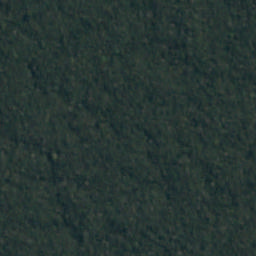

In [31]:
Image(filename=TRAIN_JPG_DIR+"/train_30036.jpg")

In [37]:
from PIL import Image
img = Image.open(TRAIN_JPG_DIR+"/train_30036.jpg")
ancho, alto = img.size
print("Ancho:", ancho)
print("Alto:", alto)

Ancho: 256
Alto: 256


In [21]:

# Como las etiquetas están en formato multilabel separados por espacios
from collections import Counter

all_tags = " ".join(train_df['tags']).split()
tag_counts = Counter(all_tags)

print("Número de clases:", len(tag_counts))
print("Frecuencia de etiquetas más comunes:")
for tag, count in tag_counts.most_common(10):
    print(tag, ":", count)

Número de clases: 17
Frecuencia de etiquetas más comunes:
primary : 37513
clear : 28431
agriculture : 12315
road : 8071
water : 7411
partly_cloudy : 7261
cultivation : 4547
habitation : 3660
haze : 2697
cloudy : 2089


In [22]:
dummies = train_df['tags'].str.get_dummies(' ') #separación de espacio
df_new = pd.concat([train_df, dummies], axis=1)

labels = dummies.columns.values
N_LABELS = len(labels)
dummies

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
40475,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
40476,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
40477,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


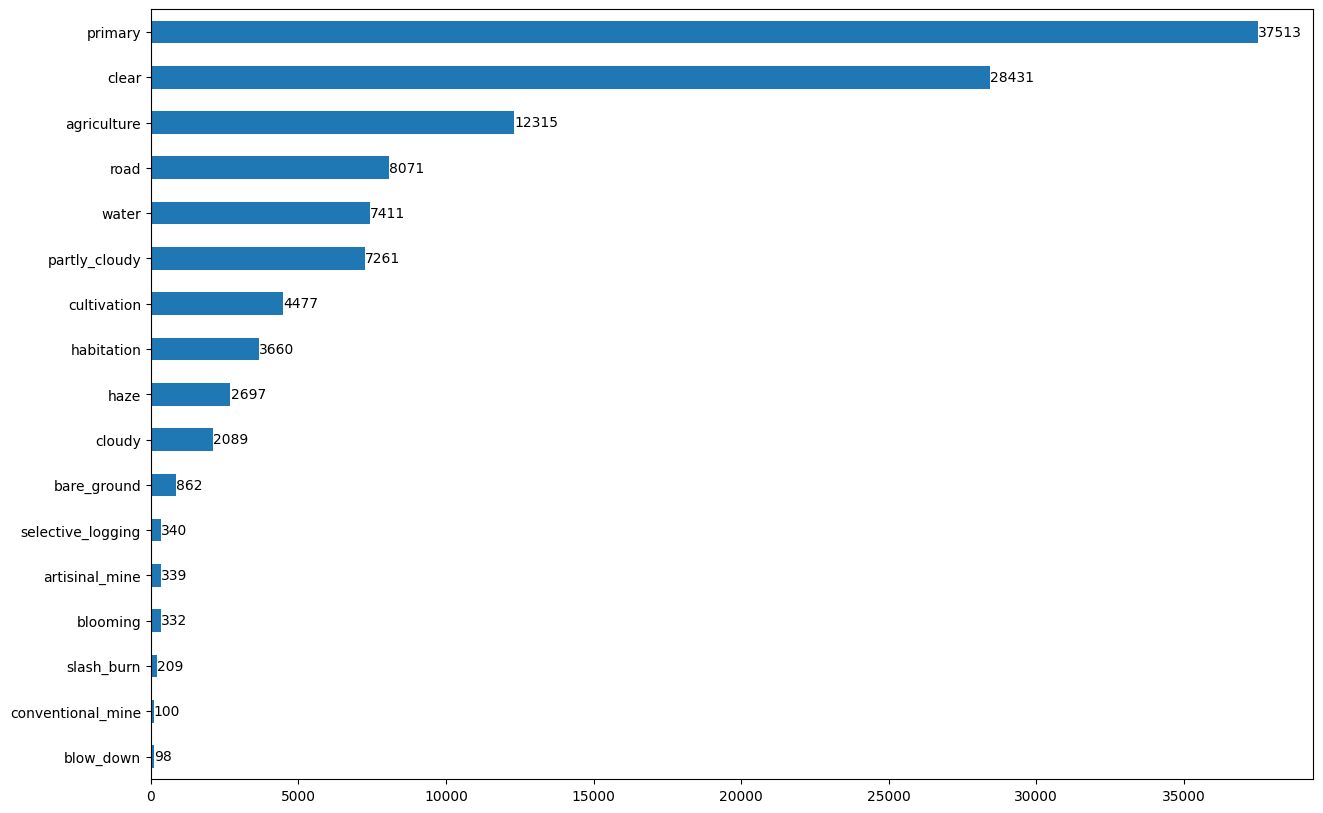

In [23]:
label_count = dummies.sum(axis=0).sort_values()

label_count.plot(kind='barh', figsize=(15, 10))
for i in range(label_count.shape[0]):
    plt.text(label_count.iloc[i] + 4, i, label_count.iloc[i], va='center')

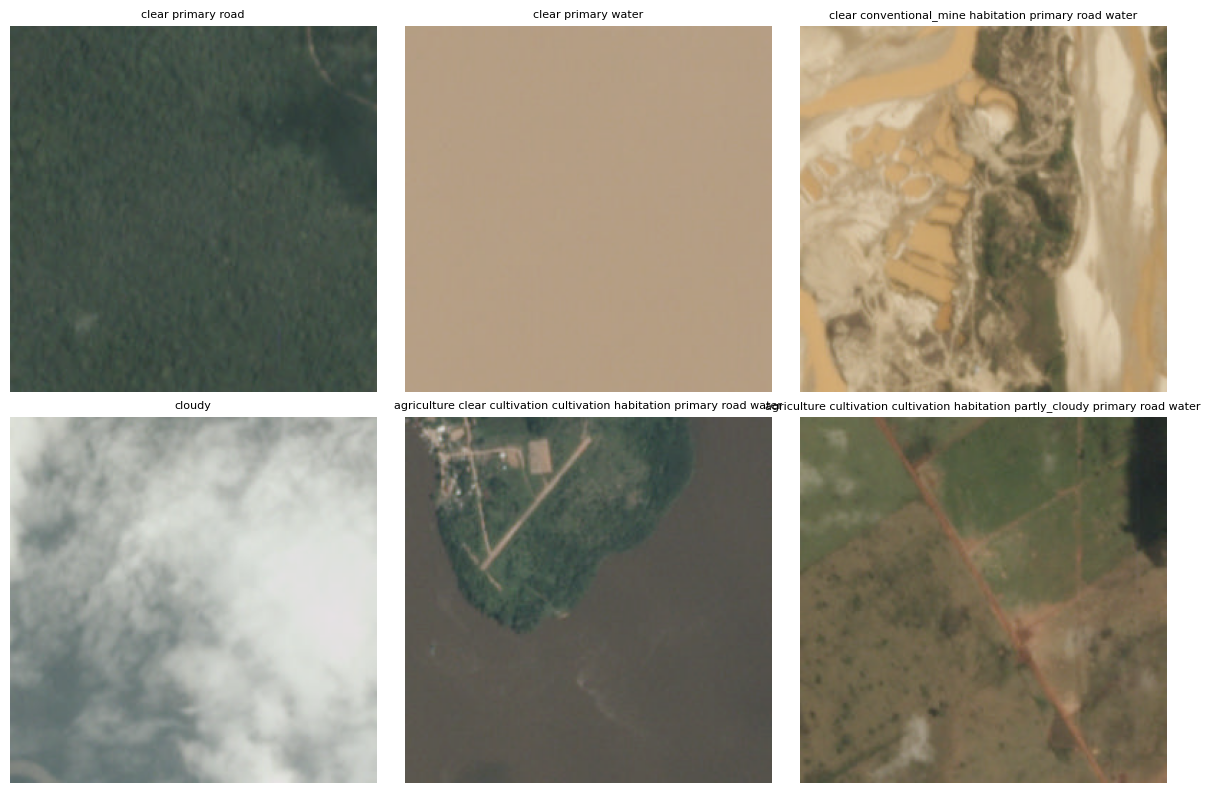

AttributeError: 'str' object has no attribute 'shape'

In [26]:
# === Mostrar imágenes de ejemplo con sus etiquetas ===
sample = train_df.sample(6, random_state=42)

plt.figure(figsize=(12,8))
for i, row in enumerate(sample.itertuples(), 1):
    img_path = os.path.join(TRAIN_JPG_DIR, f"{row.image_name}.jpg")
    img = Image.open(img_path)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(row.tags, fontsize=8)
plt.tight_layout()
plt.show()


One-hot encode the labels

In [ ]:
print(f"There are {N_LABELS} unique labels including {labels}")

There are 17 unique labels including ['agriculture' 'artisinal_mine' 'bare_ground' 'blooming' 'blow_down'
 'clear' 'cloudy' 'conventional_mine' 'cultivation' 'habitation' 'haze'
 'partly_cloudy' 'primary' 'road' 'selective_logging' 'slash_burn' 'water']


## Muestreo de etiquetas con pocas frecuencias

En este caso el conjunto de etiquetas del dataset no esta distribido de manera uniforme, Etiquetas como ` blooming`,` blow_down`, ` slash_burn` aparecen raramente en el dataset y con una prorpocionalidad de frecuencia muy baja.  





In [ ]:
images_title = []

for i, label in enumerate(labels):
   #filtro por etiqueatr
   match_rows = train_df[train_df['tags'].str.contains(label)]

   image_name = match_rows.iloc[i]['image_name']

   images_title.append(image_name + '.jpg')

In [ ]:
images_title

['train_1.jpg',
 'train_185.jpg',
 'train_57.jpg',
 'train_394.jpg',
 'train_924.jpg',
 'train_8.jpg',
 'train_27.jpg',
 'train_6357.jpg',
 'train_146.jpg',
 'train_103.jpg',
 'train_180.jpg',
 'train_88.jpg',
 'train_13.jpg',
 'train_67.jpg',
 'train_1386.jpg',
 'train_2238.jpg',
 'train_71.jpg']

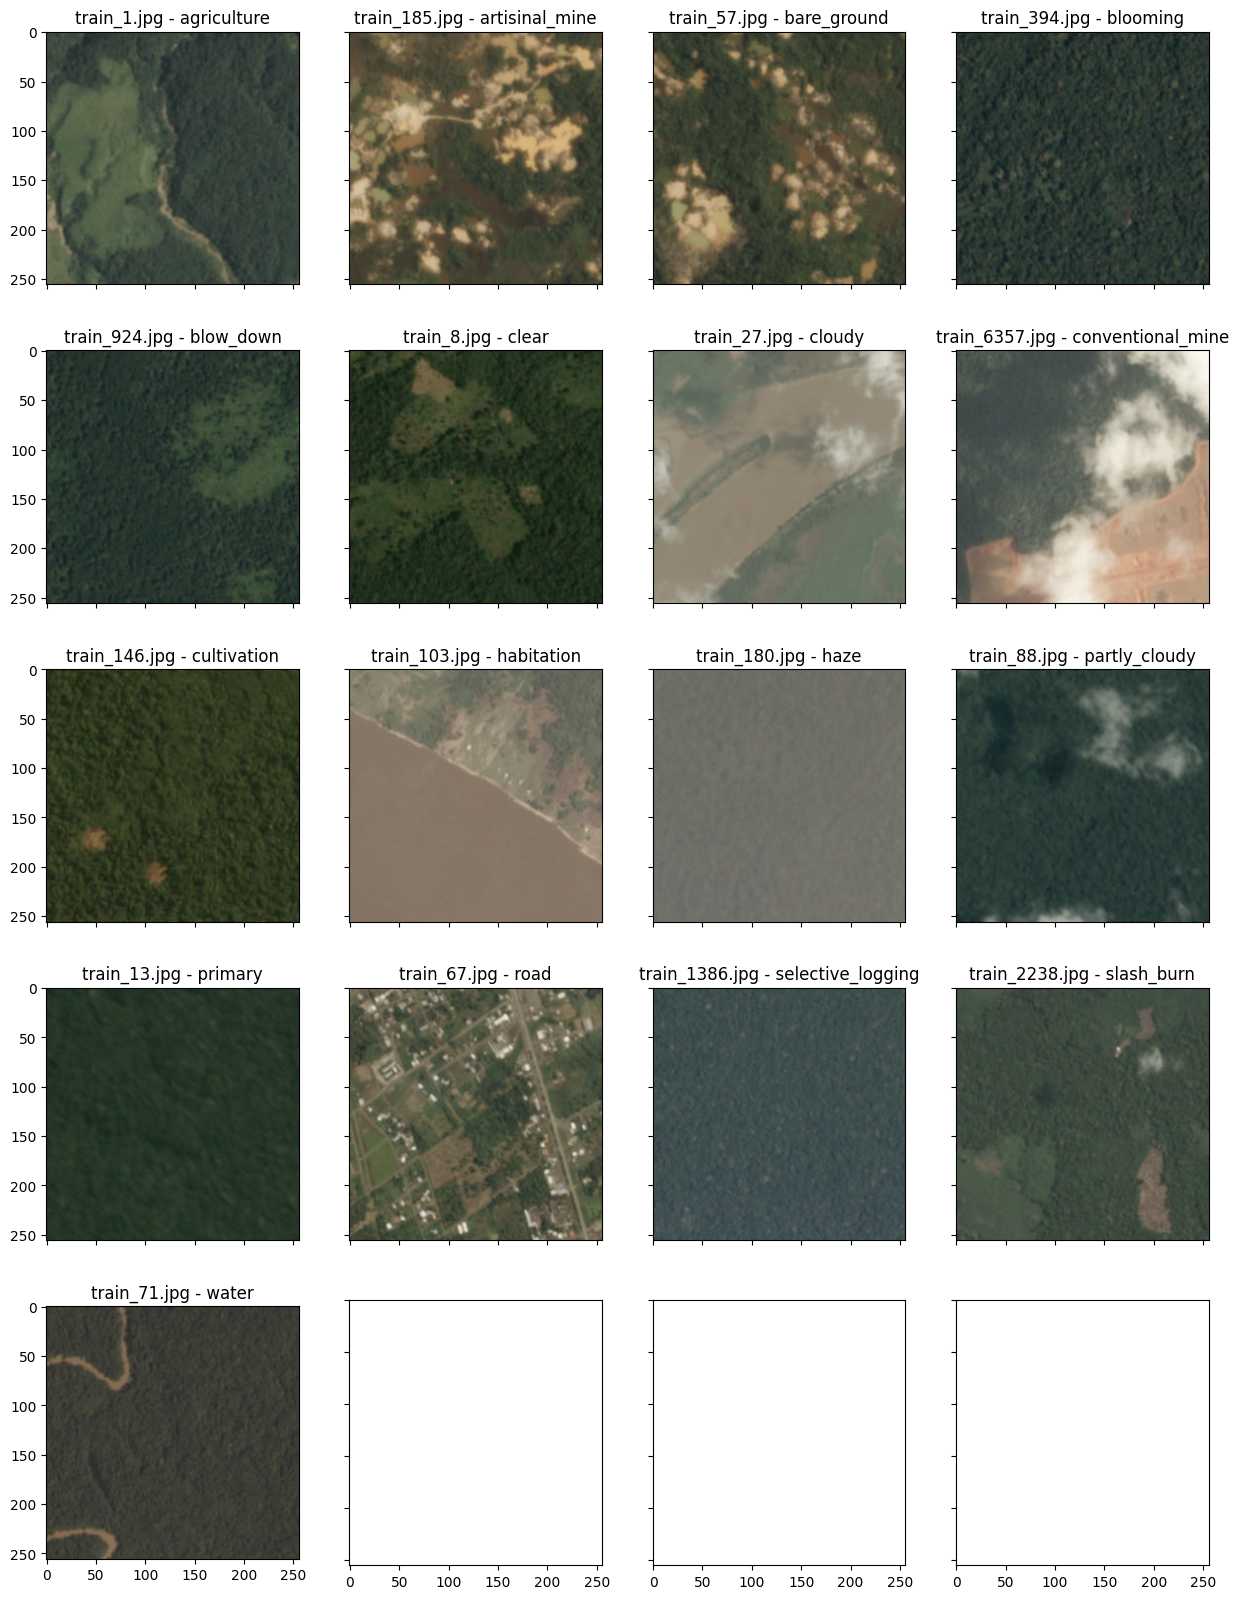